A simple example of a linearized pendulum system simulation
it shows the three implemented methods for ODE solving 
as well as the plotting as symbolic functionalities of the framework

1. Importing methods and symbols creation

In [1]:
import sympy as sp
import numpy as np
import state_space as ss
from sympy.physics.mechanics import dynamicsymbols, init_vprinting
from sympy import symbols, Eq, Function

init_vprinting()
t = sp.Symbol('t')
x1, x2 = dynamicsymbols('x_{1}(t) x_{2}(t)')
x1.diff()

2. State space equation functions, could also be defined directly.
This equations represent the pendulum linearized model

In [2]:
def x1_dot():
    eq = Eq(x1.diff(), x2)
    return eq

def x2_dot():
    m=1
    L=1
    b=0.001
    g=1
    eq = Eq(x2.diff(), -b/m*x2 -g/L*x1)
    return eq

EXT: showdown of the sympy symbolic capabilities 

In [3]:
x1_dot(), x2_dot()

3. Simulation execution for the analytical solving method

2º order system defined


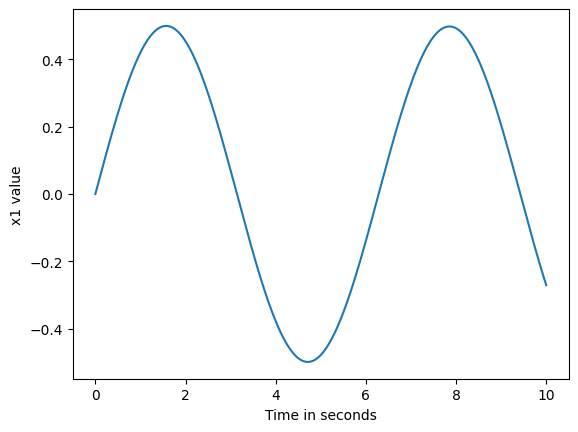

In [4]:
x1_d = x1_dot()
x2_d = x2_dot()
Solver = ss.state_space((x1, x2), *[x1_d, x2_d])
Solver.runSimulation(0, 10, 0.01, *[0, 0.5], solve_method='ana')
Solver.plot2DResults(1)

4. Nonlinear pendulum equations

In [5]:
def x1_dot():
    eq = Eq(x1.diff(), x2)
    return eq

def x2_dot():
    m=1
    L=1
    b=0.001
    g=1
    eq = Eq(x2.diff(), -b/m*x2 -g/L*sp.sin(x1))
    return eq

5. Simulation execution for the LSODA integral solving method

2º order system defined


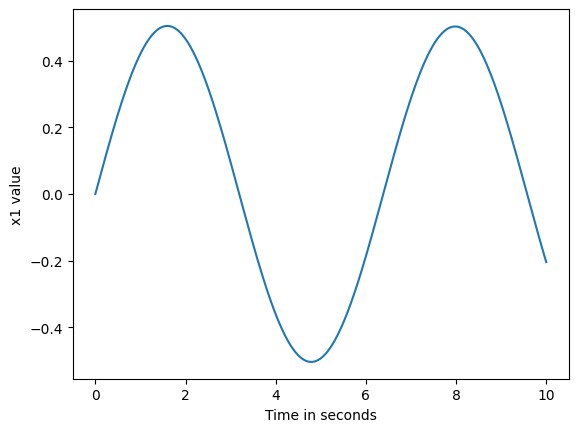

In [6]:
x1_d = x1_dot()
x2_d = x2_dot()
Solver = ss.state_space((x1, x2), *[x1_d, x2_d])
Solver.runSimulation(0, 10, 0.01, *[0, 0.5], solve_method='int')
Solver.plot2DResults(1)

6. Simulation execution for the euler solving method

2º order system defined


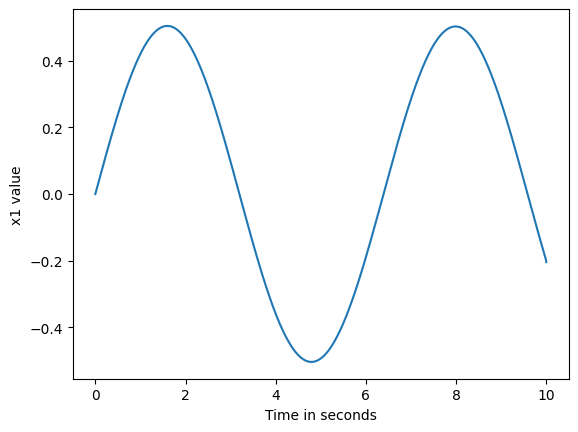

In [7]:
x1_d = x1_dot()
x2_d = x2_dot()
Solver = ss.state_space((x1, x2), *[x1_d, x2_d])
Solver.runSimulation(0, 10, 0.01, *[0, 0.5], solve_method='euler')
Solver.plot2DResults(1)

7. Phase Portrait Construction for the nonlinear equations

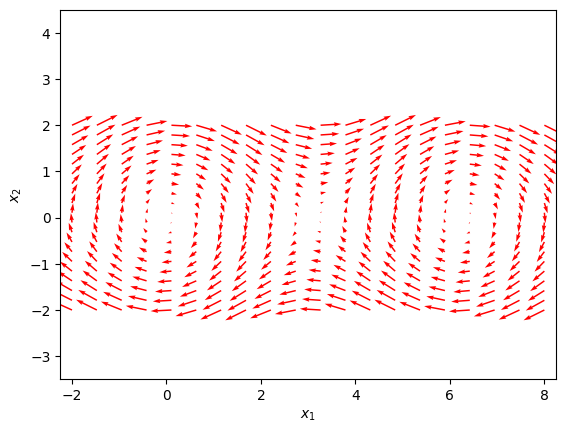

In [8]:
x1 = np.linspace(-2.0, 8.0, 20)
x2 = np.linspace(-2.0, 2.0, 20)
Solver.phasePortrait(x1, x2, 1, 2)
Solver.plot2DphasePortrait()

8. Plot the solutions for a pair of initial conditions x1, x2 for stability analysis

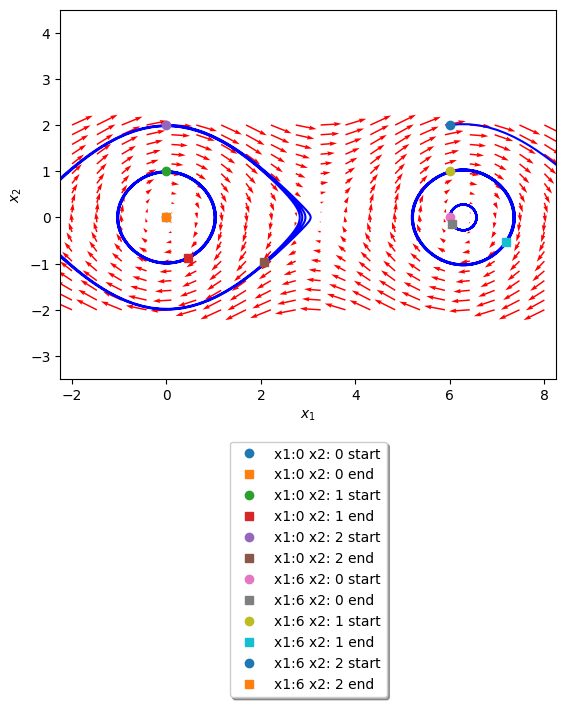

In [9]:
Solver.plot2DphasePortrait(solutions=True, x1=[0, 6], x2=[0, 1, 2])